![Winsconsin](img/winsconsin.jpeg)

🩻 **Classification de tumeurs à partir de données médicales**

**Contexte** :
Vous intégrez une équipe de développement en intelligence artificielle dans le cadre d’un projet pilote mené par un consortium de recherche médicale basé dans l’État du Wisconsin, aux États-Unis. Ce projet vise à concevoir des outils numériques d’aide au diagnostic précoce du cancer du sein, en collaboration avec des centres hospitaliers universitaires et des laboratoires d’analyses.

Dans ce cadre, un jeu de données clinique réel — le **Breast Cancer Wisconsin Diagnostic Dataset**, collecté par le Dr. William H. Wolberg au sein de l’université du Wisconsin — a été mis à disposition. Ce dataset contient les caractéristiques de cellules prélevées lors de biopsies mammaires, classées manuellement comme tumeurs bénignes ou malignes.

⸻

🎯 **Objectif** :

Votre mission consiste à concevoir un prototype fonctionnel permettant de prédire la nature de la tumeur à partir de ces données, via un modèle de classification en apprentissage supervisé ([**régression logistique**](https://www.w3schools.com/python/python_ml_logistic_regression.asp)). L’objectif est de démontrer la faisabilité d’un outil automatisé pouvant compléter l’expertise des médecins dans l’analyse de résultats de biopsies.

Construire un modèle de régression logistique capable de prédire la variable `diagnosis` à partir des caractéristiques disponibles dans le fichier ([`data/breast_cancer_wisconsin.csv`](data/breast_cancer_wisconsin.csv)).  

Pour comprendre le dataset, vous pouvez consulter cette page kaggle : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

- Exploration des données (EDA) :
    - Comprendre les variables (qualitatives/quantitatives)
	- Statistiques descriptives
	- Visualisations (histogrammes, heatmap de corrélation, etc.)
- Préparation des données :
    - Traitement des valeurs manquantes sinécessaire
	- **Transformation des variables catégorielles** (`diagnosis`)
	- **Création éventuelle de nouvelles features**
	- Standardisation si nécessaire
    - Séparation train/test
- Modélisation :
    - Implémentation d’un modèle de régression logistique
- Évaluation du modèle :
    - Calcul des métriques : accuracy, precision, recall, f1-score
    - Matrice de confusion 
    - Bonus : [Étudier AUC - ROC curve](https://www.w3schools.com/python/python_ml_auc_roc.asp)
- Intégration simple du modèle dans un script interactif
    - Intégrer votre modèle dans un script Python simple qui permet à un utilisateur de faire une prédiction à partir de nouvelles données.

⚠️ Attention aux variables fortement corrélées

Le jeu de données Breast Cancer Wisconsin contient plusieurs variables fortement corrélées entre elles, notamment :
- `radius_mean`, `perimeter_mean`, `area_mean`
- ainsi que leurs déclinaisons en `_se` et `_worst`

Cela peut poser des problèmes de multicolinéarité, particulièrement si vous utilisez des modèles linéaires (régression logistique, SVM linéaire, etc.). Ces redondances peuvent fausser les résultats ou générer un sur-apprentissage.

➤ Recommandations :
- Identifiez les corrélations fortes à l’aide d’une matrice de corrélation ou d’une heatmap
- En cas de corrélation > 0.9 entre deux variables, conservez une seule variable du groupe
- Bonus (niveau légende 😈) : vous pouvez également étudier et appliquer une [réduction de dimension type PCA (Pricipal Component Analysis)](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-de-donnees-exploratoire/5280368-comprenez-lenjeu-de-lanalyse-en-composantes-principales) si vous souhaitez automatiser le traitement de la redondance

#### 📝 **Plan détaillé de résolution**

2. **Préparation des données**
    - Suppression éventuelle de colonnes non pertinentes (`id`)
    - Gestion des valeurs manquantes si besoin
    - Encodage de la variable cible (`diagnosis`: M=1, B=0)
    - Détection et traitement des variables fortement corrélées (corrélation > 0.9)
    - (Optionnel) Création de nouvelles features ou réduction de dimension (PCA)
    - Standardisation des variables quantitatives

3. **Séparation du jeu de données**
    - Séparer les données en features (X) et cible (y)
    - Split train/test (ex: 80% train, 20% test)

4. **Modélisation**
    - Instancier et entraîner un modèle de régression logistique
    - Prédire sur le jeu de test

5. **Évaluation du modèle**
    - Calculer les métriques : accuracy, precision, recall, f1-score
    - Afficher la matrice de confusion
    - (Bonus) Tracer la courbe ROC et calculer l’AUC

6. **Intégration simple**
    - Créer un script interactif permettant de saisir de nouvelles données et d’obtenir une prédiction du modèle

7. **(Bonus) Analyse avancée**
    - Étude de la multicolinéarité (VIF)
    - Réduction de dimension (PCA)
    - Interprétation des coefficients du modèle

---

**À chaque étape, documenter vos choix et illustrer par des visualisations lorsque pertinent.**

# 1. **Exploration des données (EDA)**
Cette étape vise à comprendre la structure et les caractéristiques du jeu de données.  
Nous avons :

- **569 échantillons** (biopsies), chacun décrit par **30 variables quantitatives** issues de mesures cellulaires.
- **2 variables qualitatives** :  
    - `id` (identifiant, non utilisée pour la modélisation)
    - `diagnosis` (cible : `M` = malin, `B` = bénin)

**Points clés de l’exploration :**

- **Pas de valeurs manquantes** détectées dans le dataset.
- **Répartition de la cible** :  
    - Classe bénigne (`B`) : ~63 %
    - Classe maligne (`M`) : ~37 %
- **Statistiques descriptives** :  
    - Forte variabilité et dispersion selon les variables.
    - Présence de valeurs extrêmes (outliers) sur certaines mesures.
- **Visualisations** :  
    - Les histogrammes montrent des distributions parfois asymétriques ou multimodales.
    - La heatmap de corrélation révèle des groupes de variables très fortement corrélées (ex : `radius_mean`, `perimeter_mean`, `area_mean`).

**À retenir pour la suite :**

- Il faudra traiter la **multicolinéarité** (variables très corrélées) avant la modélisation.
- La standardisation des variables quantitatives sera nécessaire.
- Le léger déséquilibre des classes devra être pris en compte lors de l’évaluation du modèle.

- Imports

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score, classification_report
)

- Chargement des données

In [34]:
# Chargement des données
df = pd.read_csv("data/breast_cancer_wisconsin.csv")

- Afficher les premières lignes du dataset (`df.head()`)


In [ ]:
# Afficher les premières lignes du DataFrame pour un aperçu des données
display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Analyse :**

Les premières lignes du DataFrame permettent de se familiariser avec la structure des données.  
On observe que chaque ligne correspond à un échantillon (biopsie) identifié par un `id`, avec une variable cible `diagnosis` (`M` = malin, `B` = bénin).  
Les autres colonnes sont des variables quantitatives décrivant les caractéristiques des cellules (par exemple : `radius_mean`, `texture_mean`, etc.).

- Vérifier la présence de valeurs manquantes (`df.isnull().sum()`)

In [ ]:
# Vérifier la présence de valeurs manquantes dans chaque colonne et afficher uniquement celles qui en ont
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("Aucune valeur manquante détectée dans le dataset.")
else:
    print("Colonnes avec valeurs manquantes :")
    print(missing_values)

Aucune valeur manquante détectée dans le dataset.


- Comprendre la répartition de la variable cible (`diagnosis`)

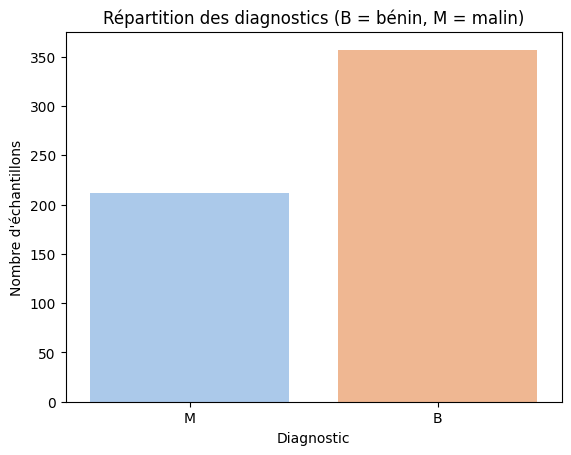

Classe B : 62.74% (357 échantillons)
Classe M : 37.26% (212 échantillons)


In [36]:
# Afficher la répartition de la variable cible 'diagnosis'
sns.countplot(data=df, x='diagnosis', hue='diagnosis', palette='pastel', legend=False)
plt.title("Répartition des diagnostics (B = bénin, M = malin)")
plt.xlabel("Diagnostic")
plt.ylabel("Nombre d'échantillons")
plt.show()

# Afficher les proportions joliment formatées
diagnosis_counts = df['diagnosis'].value_counts(normalize=True)
for label, proportion in diagnosis_counts.items():
    print(f"Classe {label} : {proportion:.2%} ({df['diagnosis'].value_counts()[label]} échantillons)")

**Analyse :**

On observe un déséquilibre modéré des classes : la classe bénigne (B) est majoritaire (~63%), la classe maligne (M) représente ~37% des échantillons.  
Ce déséquilibre doit être pris en compte lors de l'évaluation du modèle, notamment pour les métriques comme la précision et le rappel.

- Distinguer variables qualitatives/quantitatives

In [37]:
# Distinguer les variables qualitatives et quantitatives dans le DataFrame

qualitative_vars = ['id', 'diagnosis']
quantitative_vars = [col for col in df.columns if col not in qualitative_vars]

print("Variables qualitatives :", qualitative_vars)
print("Variables quantitatives :", quantitative_vars)

Variables qualitatives : ['id', 'diagnosis']
Variables quantitatives : ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


**Analyse :**

Les variables qualitatives sont : 'id' (identifiant unique, non utilisée pour la modélisation) et 'diagnosis' (cible).  
Toutes les autres colonnes sont quantitatives et décrivent des mesures issues des biopsies.  
On retrouve 30 variables quantitatives, souvent regroupées par famille (mean, se, worst).  
Cette distinction est utile pour l'analyse statistique, la visualisation et la préparation des données.  

- Statistiques descriptives (`df.describe()`)

In [ ]:
# Afficher les statistiques descriptives des variables quantitatives
df[quantitative_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Analyse des statistiques descriptives

- **Variabilité des mesures** : Les moyennes, médianes et étendues varient fortement selon les variables.
- **Dispersion** : Certaines variables présentent des écarts-types élevés, indiquant une forte dispersion (ex : `area_mean`, `perimeter_mean`).
- **Valeurs extrêmes** : Les min/max révèlent la présence de valeurs extrêmes, ce qui peut indiquer des outliers.
- **Préparation** : Cette étape permet d’identifier les variables à standardiser et celles qui pourraient nécessiter un traitement particulier.

- Visualiser la distribution des variables principales (histogrammes, boxplots)

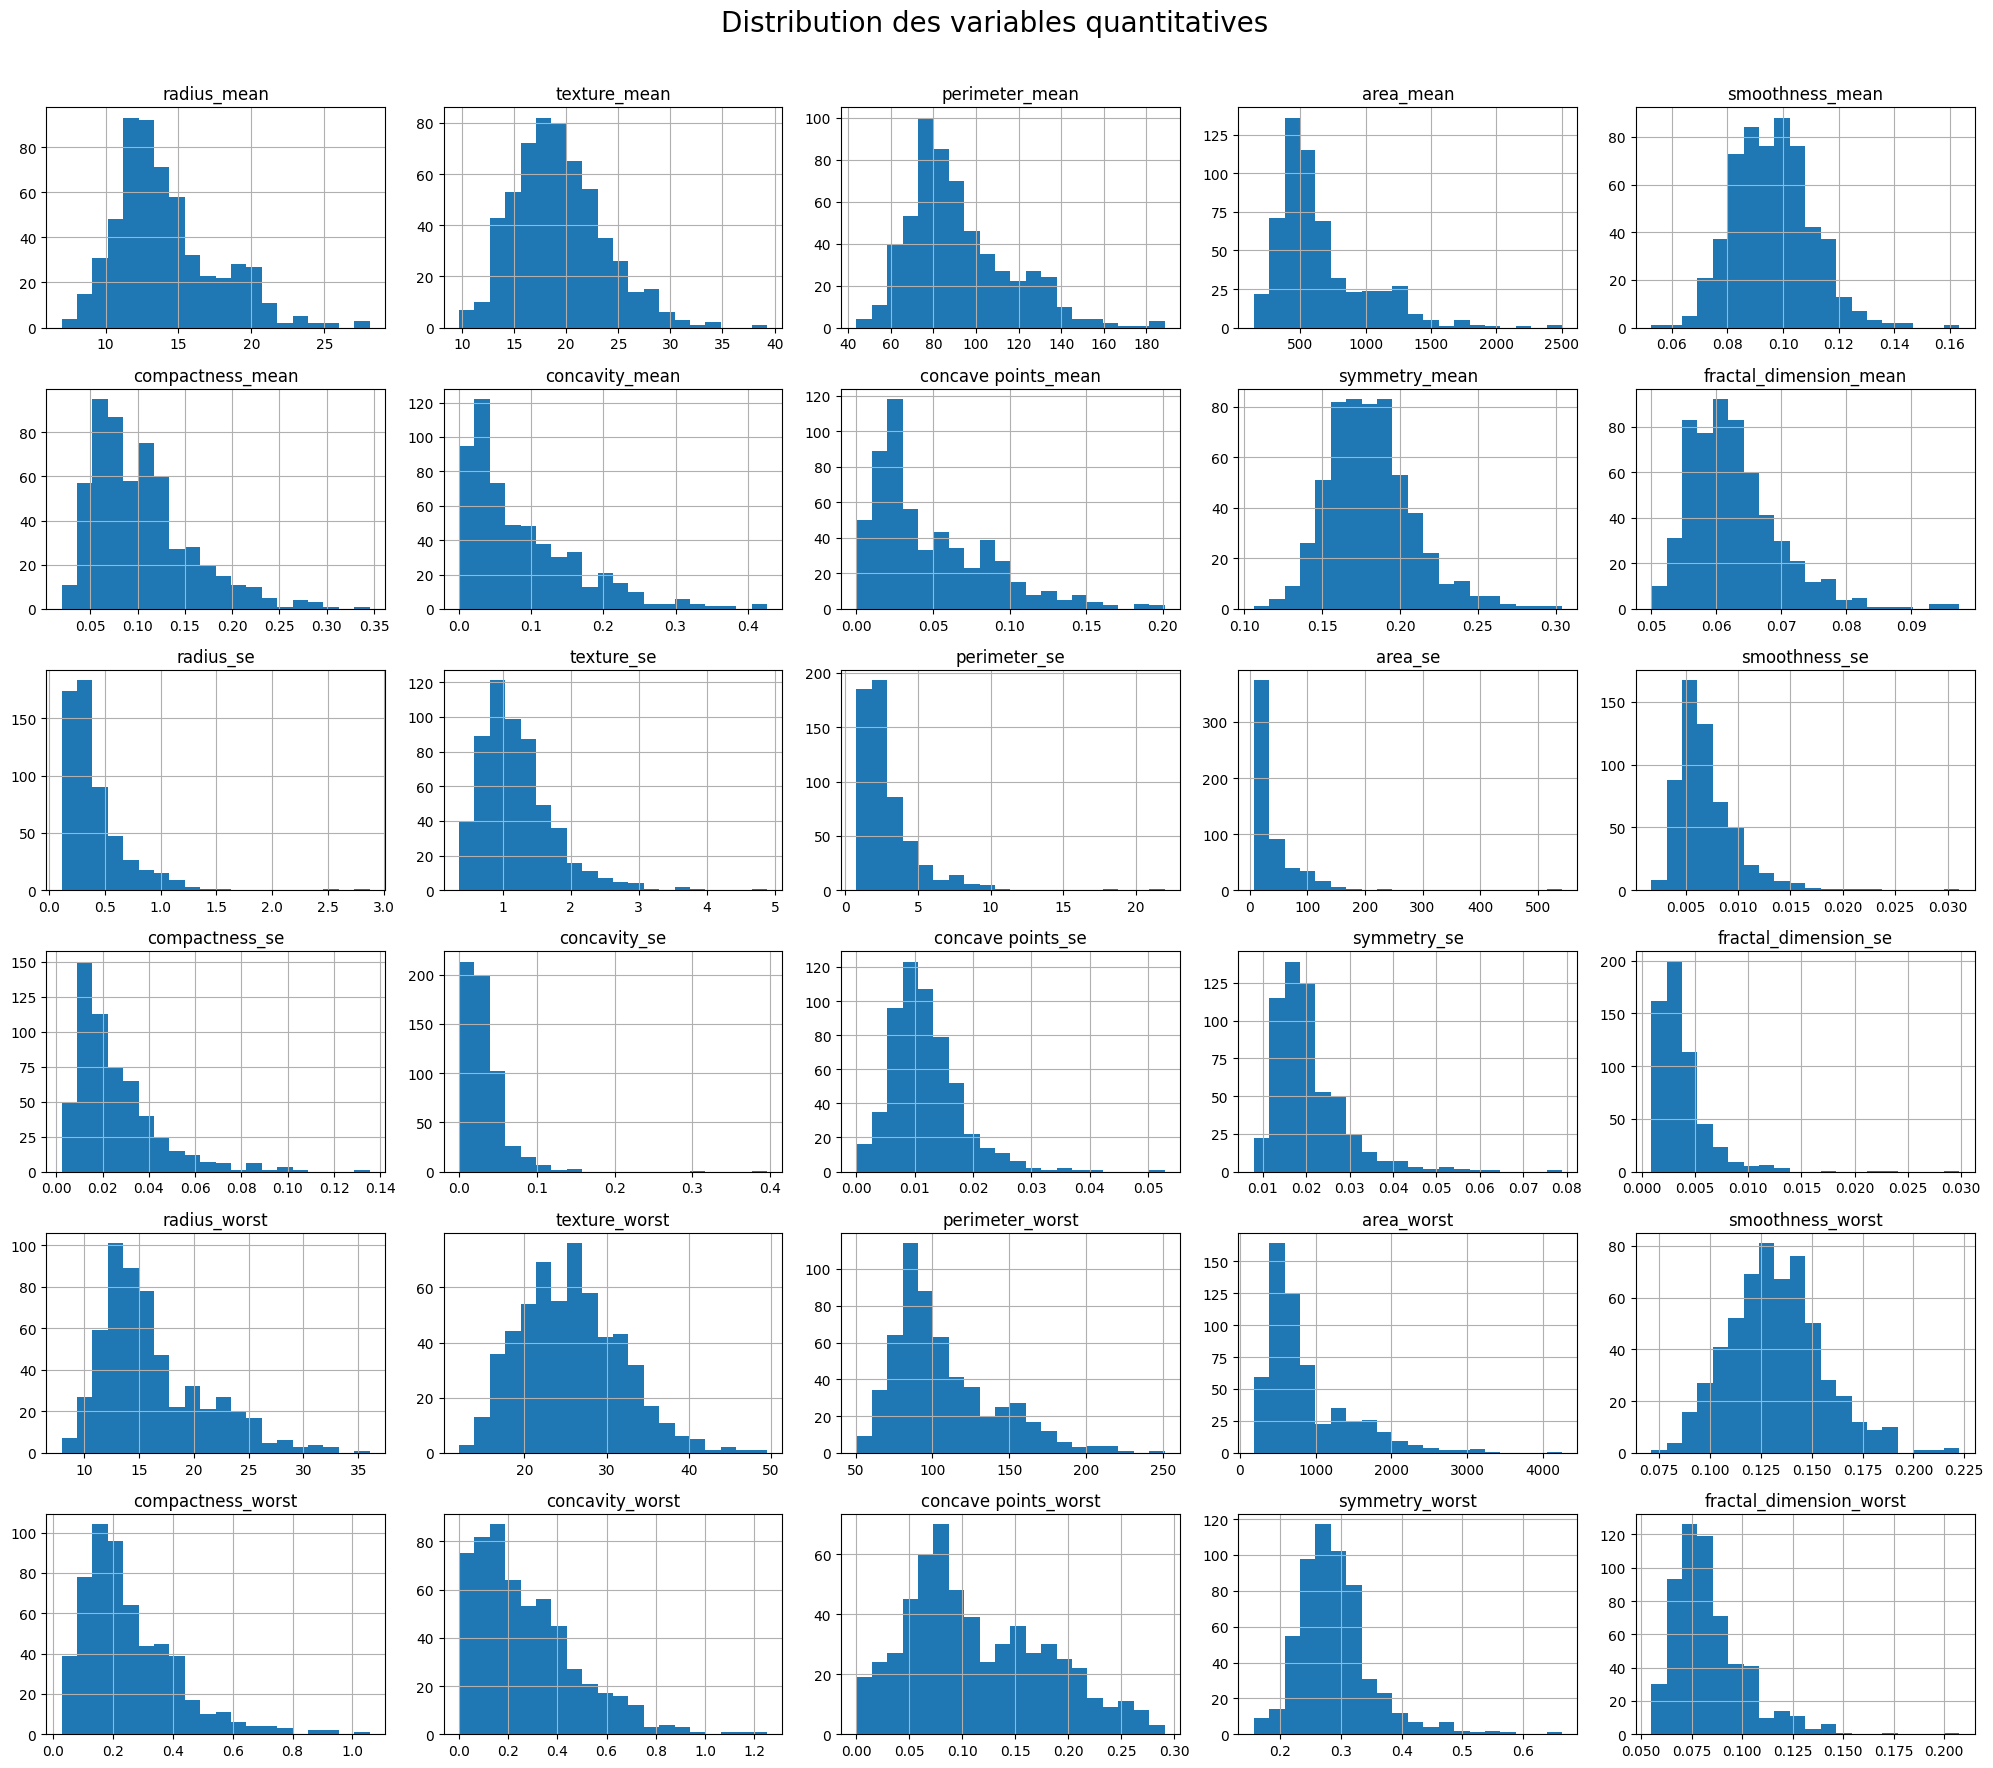

In [31]:
# Visualiser la distribution des principales variables quantitatives avec des histogrammes
df[quantitative_vars].hist(bins=20, figsize=(20, 18), layout=(6, 5))
plt.suptitle("Distribution des variables quantitatives", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

- Visualiser la corrélation entre variables (matrice de corrélation, heatmap)

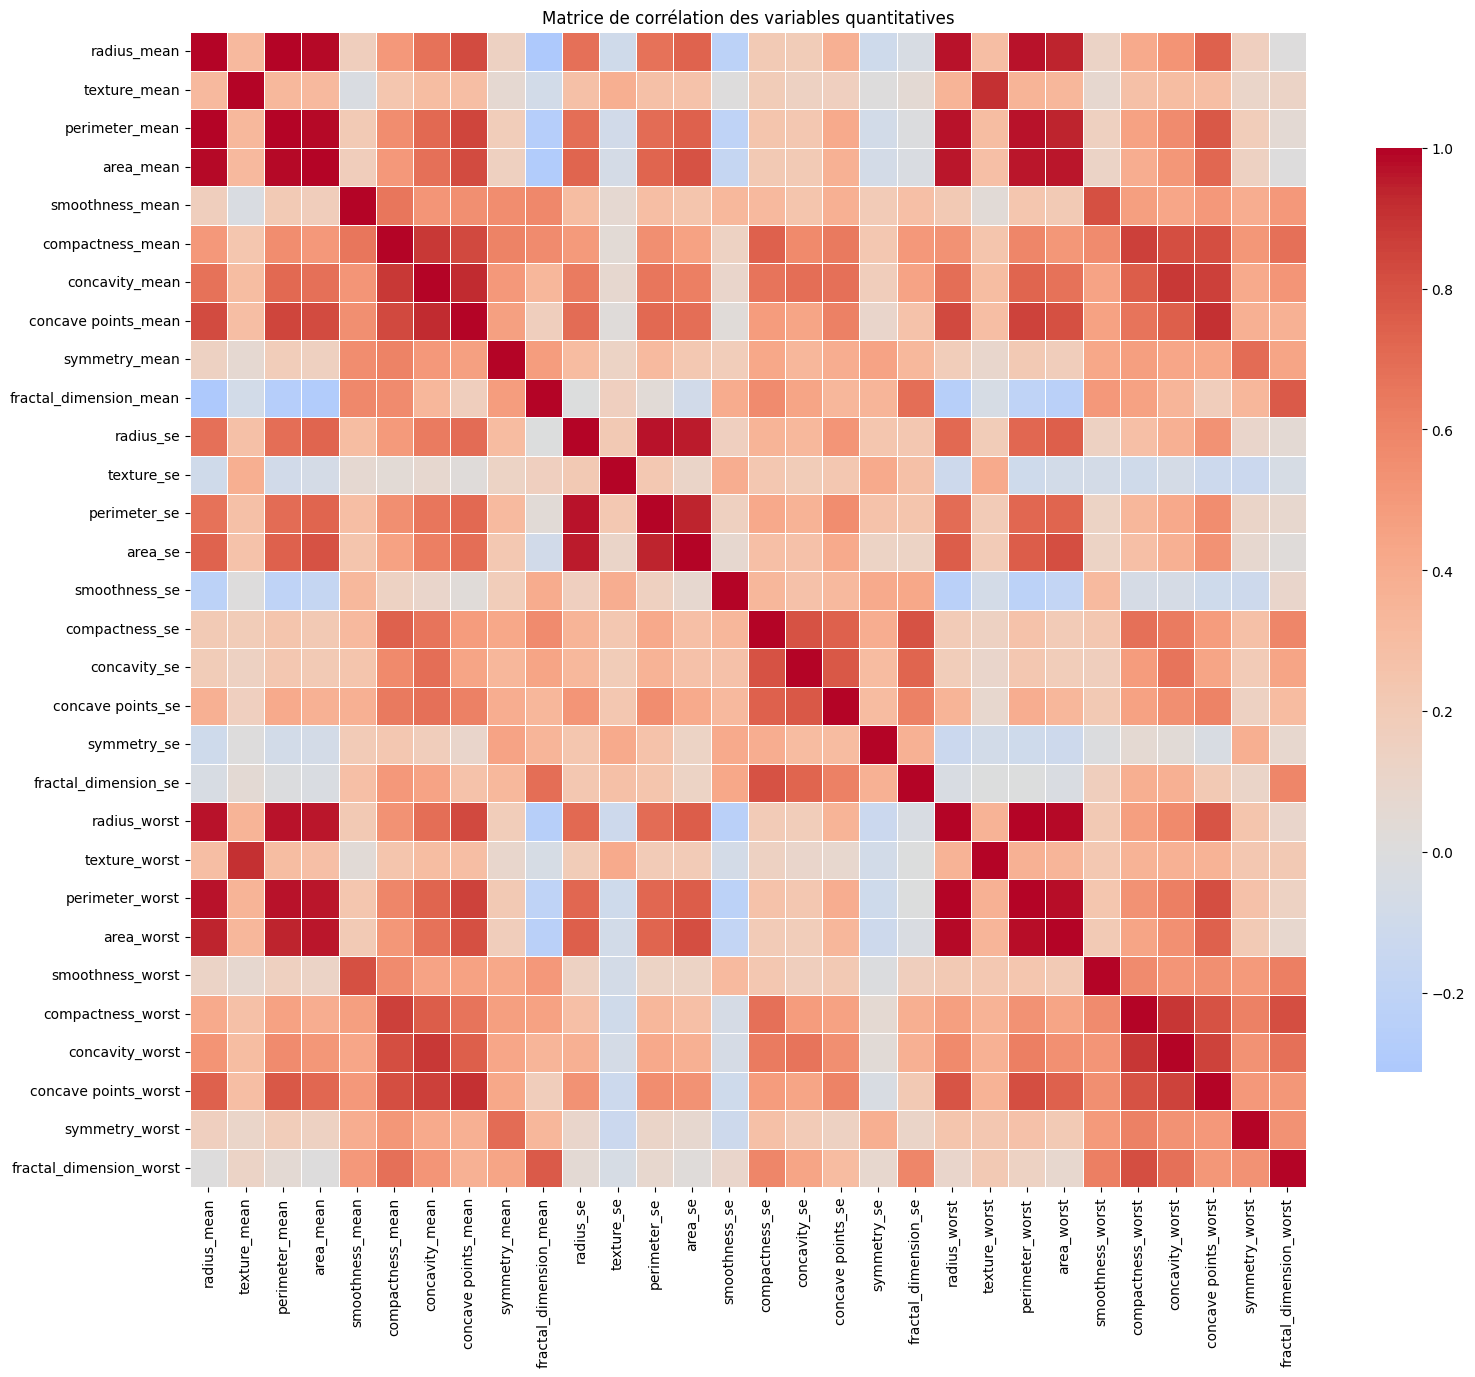

In [32]:
# Calcul de la matrice de corrélation pour les variables quantitatives
corr_matrix = df[quantitative_vars].corr()

# Affichage de la heatmap des corrélations
plt.figure(figsize=(18, 15))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()